In [63]:
# Set up library

import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%pylab inline

import os, sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [64]:
# Project directory: D:/Projects/5.0 Personal project/26. Digit Recognition
# Prepare the environment

def now():
    tmp = datetime.datetime.now().strftime("%m/%d/%y %H:%M:%S")
    return tmp

def change_dir(dir):
    os.chdir("D:/Projects/5.0 Personal project/13.0 Mushroom")
    print("{}: Current Working Directory: {}".format(now(), os.getcwd()))
    os.chdir(dir)
    print("{}: Now Working Directory: {}".format(now(), os.getcwd()))

data_dir = "./Data"
change_dir(str(data_dir))


03/02/17 20:27:44: Current Working Directory: D:\Projects\5.0 Personal project\13.0 Mushroom
03/02/17 20:27:44: Now Working Directory: D:\Projects\5.0 Personal project\13.0 Mushroom\Data


In [65]:
raw_data = pd.read_csv('mushrooms.csv')
print("{}: The sizing of data: {}".format(now(), raw_data.shape))
print("First 5 records: \n")
print(raw_data.head(5))
print("\nSummary of class:")
print(raw_data['class'].value_counts(sort=True))

03/02/17 20:27:44: The sizing of data: (8124, 23)
First 5 records: 

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-co

In [66]:
# Change to number from character

from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = label_encoder.fit_transform(raw_data[col])

print(raw_data.head(5))
print(raw_data['class'].value_counts(sort=True))

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color   ...     stalk-surface-below-ring  \
0             0          1           4   ...                            2   
1             0          0           4   ...                            2   
2             0          0           5   ...                            2   
3             0          1           5   ...                            2   
4             1          0           4   ...                            2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  

In [67]:
target = raw_data["class"]
raw_data = raw_data.drop("class",1)

In [68]:
# Build Function for model building and score them
def eval_model_classifier(model, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    model.fit(trainX, trainY) # Build model using training data
    return model.score(testX,testY)

03/02/17 20:27:44: RandomForestClassification Starts!
03/02/17 20:27:44: Done try n_estimators = 1 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:44: Done try n_estimators = 5 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:44: Done try n_estimators = 10 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:45: Done try n_estimators = 50 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:47: Done try n_estimators = 100 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:50: Done try n_estimators = 200 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:57: Done try n_estimators = 500 with mean score = 1.0 and standard deviation = 0.0
03/02/17 20:27:57: RandomForestClassification Done!


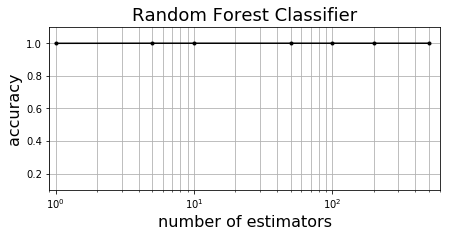

In [69]:
num_estimators_array = np.array([1,5,10,50,100,200,500]) 
num_smpl = 10 # Test run the model according to samples_number
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid) # Keep mean
score_array_sigma = np.zeros(num_grid) # Keep Standard deviation 
j=0

print("{}: RandomForestClassification Starts!".format(now()))
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl) # Initialize
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = eval_model_classifier(rf_class, raw_data.iloc[0:1000], target.iloc[0:1000], 0.8)
    score_array_mu[j], score_array_sigma[j] = mean(score_array), std(score_array)
    print("{}: Done try n_estimators = {} with mean score = {} and standard deviation = {}".format(now(),
                                                                                                   n_estimators, 
                                                                                                   round(score_array_mu[j], 2),
                                                                                                   round(score_array_sigma[j], 2)))
    j=j+1

print("{}: RandomForestClassification Done!".format(now()))

figure(figsize(7,3))
errorbar(num_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 16)
ylabel("accuracy",size = 16)
xlim(0.9,600)
ylim(0.1,1.1)
title("Random Forest Classifier", size = 18)
grid(which="both")

In [70]:
rf_class = rf_class.fit(raw_data.iloc[0:2000], target.iloc[0:2000])

Feature ranking:
1. feature 4 (0.450702): odor
2. feature 7 (0.178463): gill-size
3. feature 10 (0.072301): stalk-root
4. feature 21 (0.064738): habitat
5. feature 3 (0.050400): bruises
6. feature 1 (0.044666): cap-surface
7. feature 9 (0.035234): stalk-shape
8. feature 20 (0.022611): population
9. feature 2 (0.020594): cap-color
10. feature 6 (0.019611): gill-spacing


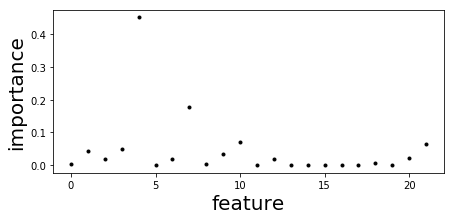

In [71]:
importances = rf_class.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,10):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], raw_data.columns[indices[f]]))

# Plot the feature importances

figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
xlabel("feature",size=20)
ylabel("importance",size=20)

In [72]:
columns = raw_data.columns.values
i=0
for col in columns:
   print("{}: {}".format(i, col))
   i+=1


0: cap-shape
1: cap-surface
2: cap-color
3: bruises
4: odor
5: gill-attachment
6: gill-spacing
7: gill-size
8: gill-color
9: stalk-shape
10: stalk-root
11: stalk-surface-above-ring
12: stalk-surface-below-ring
13: stalk-color-above-ring
14: stalk-color-below-ring
15: veil-type
16: veil-color
17: ring-number
18: ring-type
19: spore-print-color
20: population
21: habitat


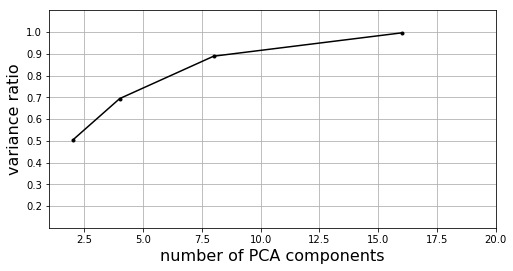

In [73]:
# Try to choose the minimum k (components) while retain the most information
n_components_array = np.array([2, 4, 8, 16])
vr = np.zeros(len(n_components_array))

i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    pca.fit(raw_data)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1 

figure(figsize(8,4))
plot(n_components_array,vr,'k.-')
ylim(0.1,1.1)
yticks(linspace(0.2,1.0,9))
xlim(1, 20)
grid(which="both")
xlabel("number of PCA components",size=16)
ylabel("variance ratio",size=16)

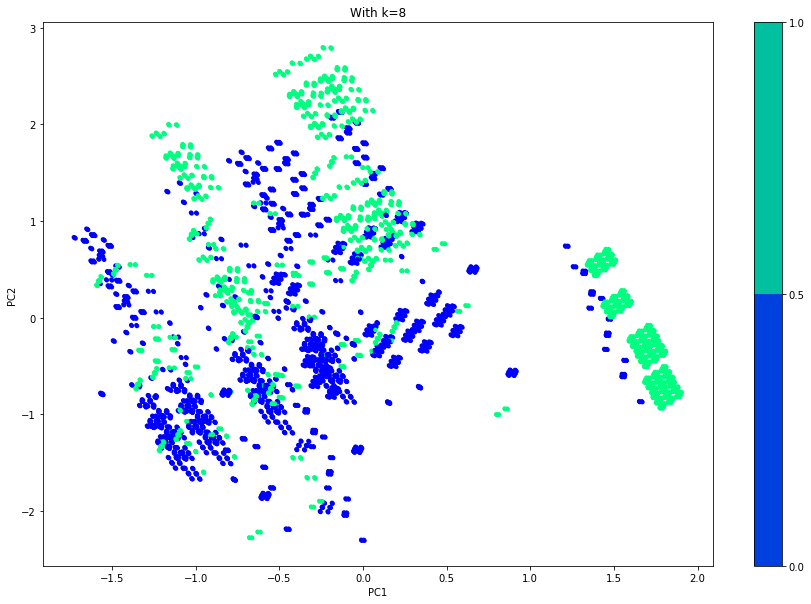

In [74]:
# Select k = 8
n_components = 8

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(raw_data)
transform = pca.transform(raw_data)
figure(figsize(15,10))
plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "winter", edgecolor = "None")
plt.colorbar(boundaries=np.linspace(0,1,3))
clim(0,1)
xlabel("PC1")
ylabel("PC2")
title("With k={}".format(n_components))
